<a href="https://colab.research.google.com/github/AdamSabry1233/Boston-Housing/blob/main/Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Neccesary Libraries**

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


**Loading the Data**



In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTzQC6rXH52HLwQJaO-cL01ekIsbChwbQUxPjvr3qX3-3J4t1CDUkW23XZK8QI5seh7Y-ItK87ht48K/pub?output=csv'

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

train_data = pd.read_csv(url, header = None, delimiter=r"\s+", names = column_names)

**Taking a look at the Dataset**

In [ ]:
print(train_data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
print(np.shape(train_data))

(506, 14)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
train_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
train_data['CRIM'].value_counts()

,count
CRIM,
0.01501,2
14.33370,2
0.03466,1
0.03113,1
0.03049,1
...,...
1.51902,1
1.83377,1
1.46336,1


In [ ]:
train_data.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [ ]:
train_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
train_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
train_data.dtypes[train_data.dtypes != 'object']

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,float64


In [ ]:
train_data.query('MEDV > 45 ' )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307.0,17.4,377.51,3.92,46.7


In [ ]:
stats.zscore(train_data['ZN']).sort_values().tail(10)

,ZN
256,3.375039
284,3.375039
55,3.375039
353,3.375039
283,3.375039
203,3.589637
200,3.589637
199,3.589637
204,3.589637
57,3.804234


In [ ]:
train_data.query('TAX > 500 ' )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6


Taking a look to see if there is any null values

In [ ]:
pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)).head(20)

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Visualize the Data

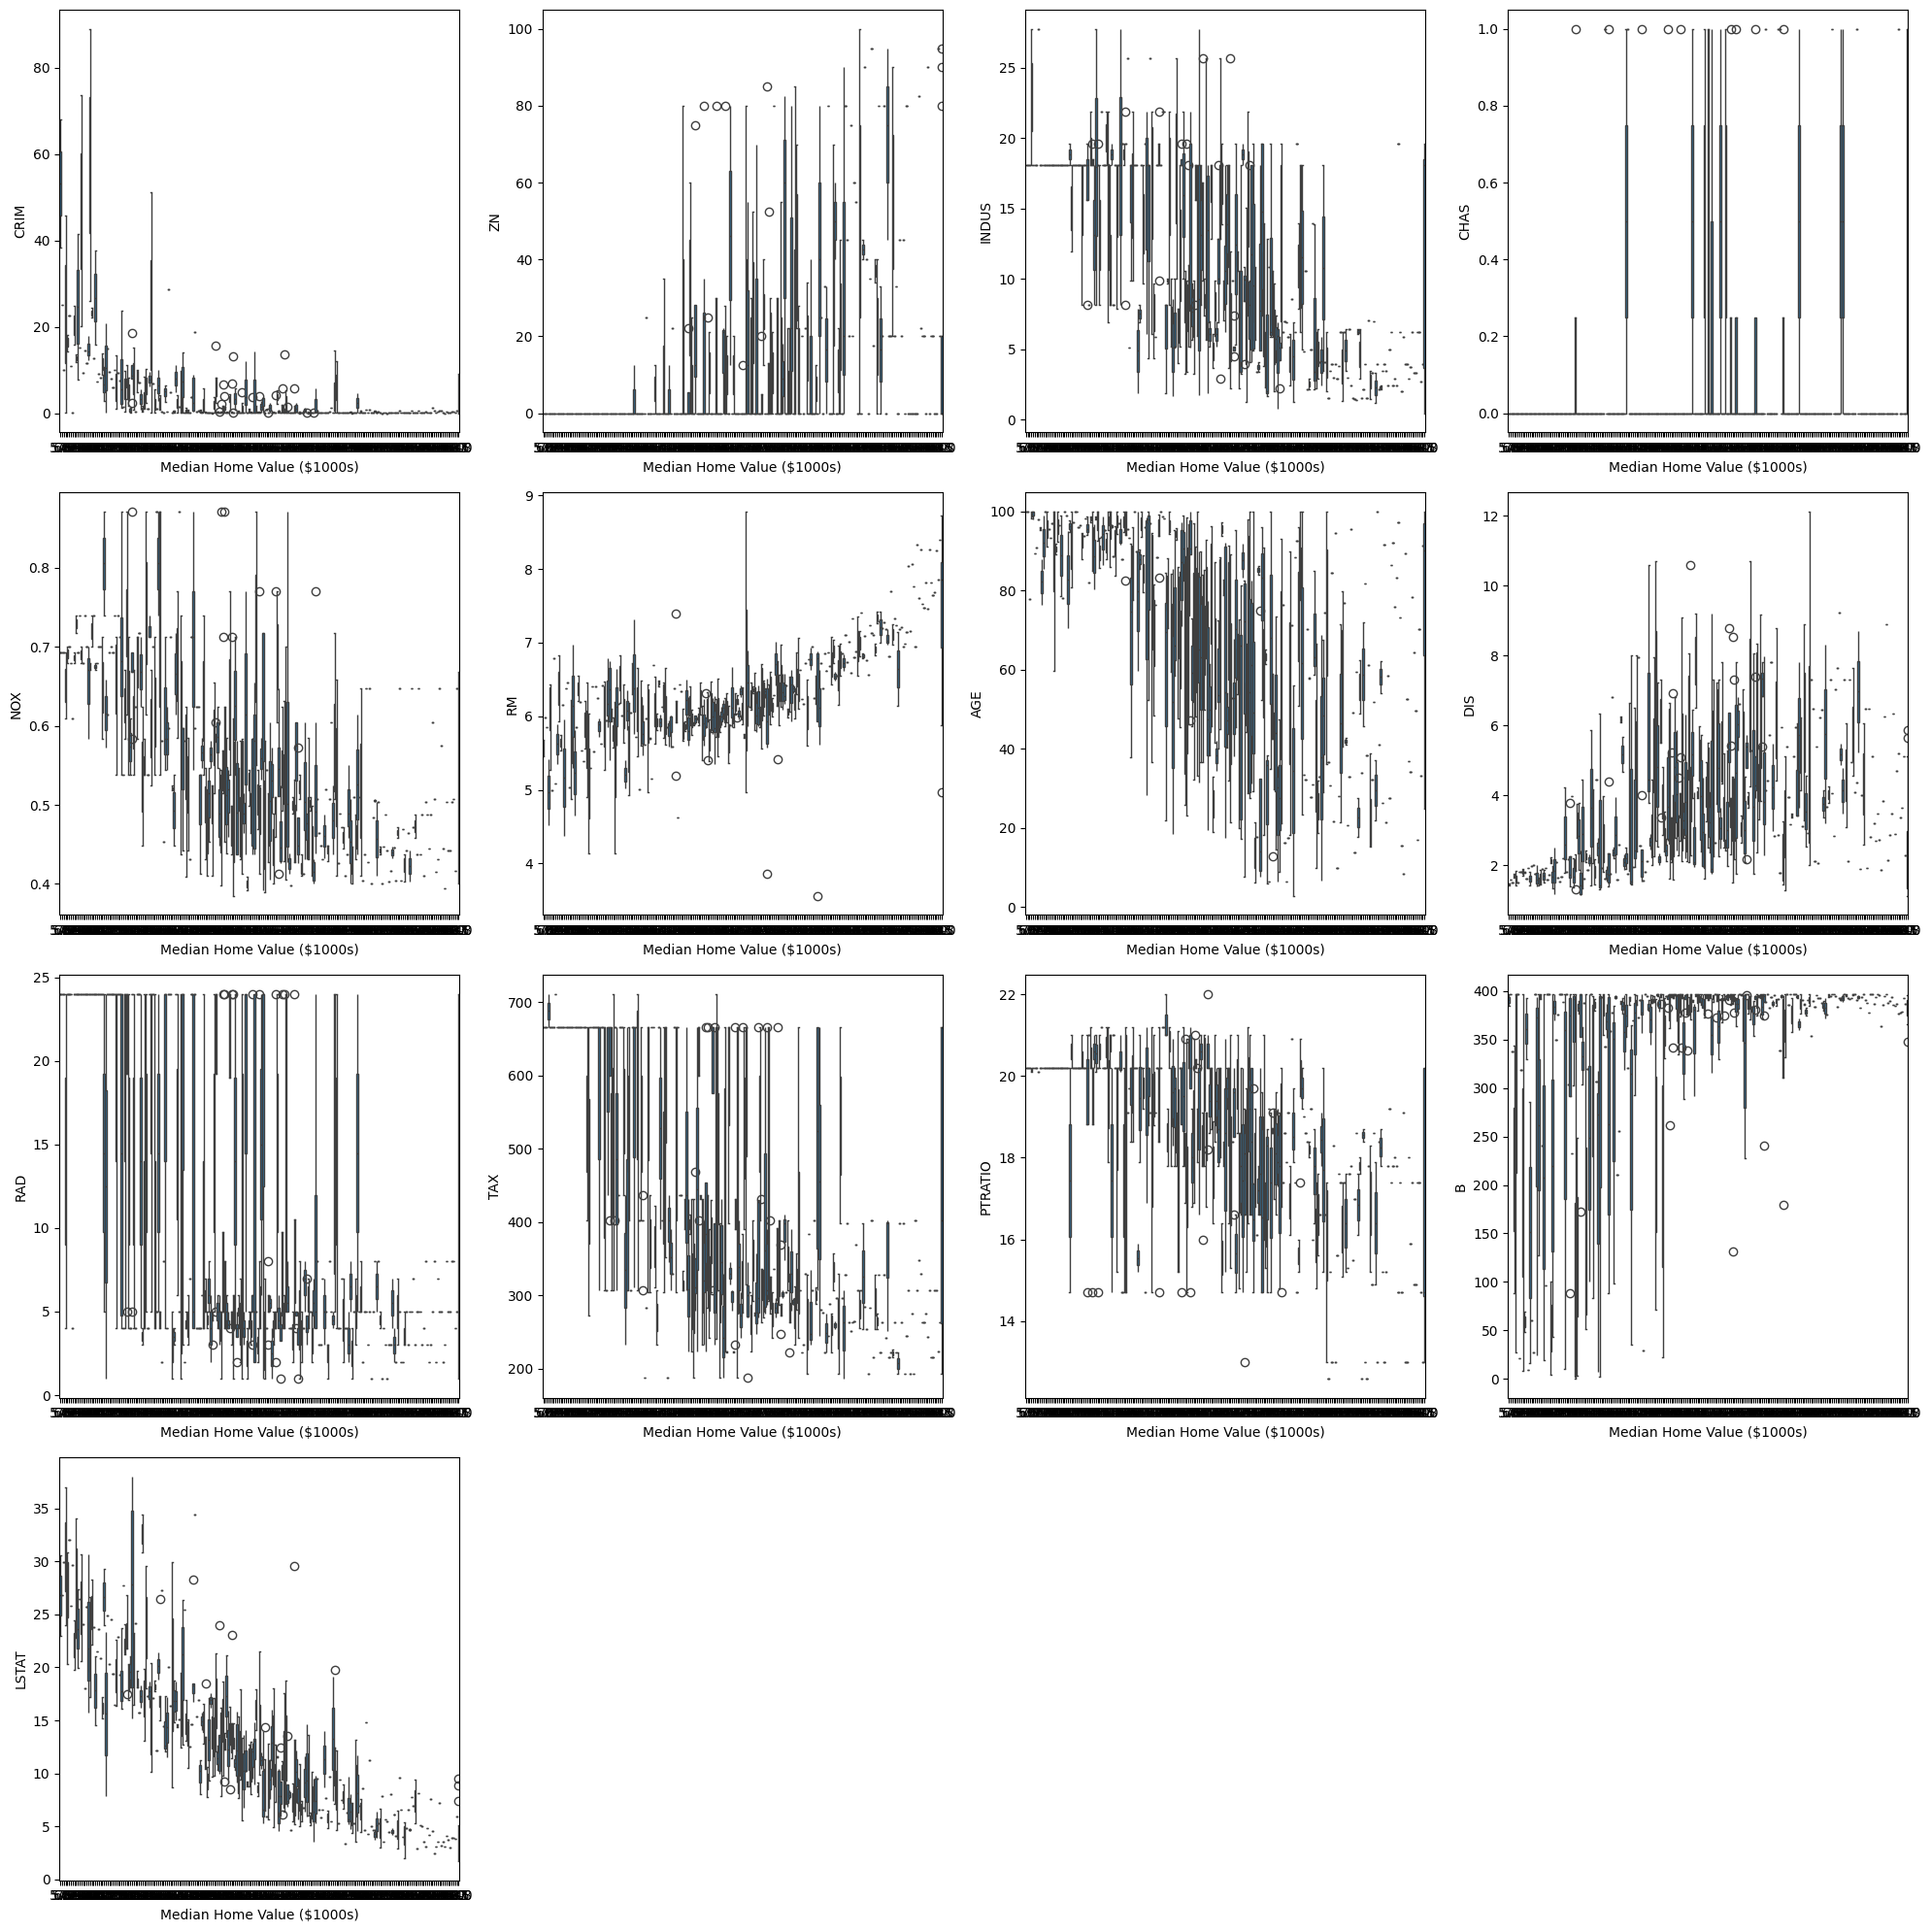

In [ ]:

# List of variables to compare with MEDV
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a figure with a grid of subplots (4 rows, 4 columns to match 13 variables)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust grid size to fit all variables
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the variables and create boxplots for each
for i, var in enumerate(variables):
    sns.boxplot(data=train_data, x='MEDV', y=var, ax=axes[i])
    axes[i].set_xlabel('Median Home Value ($1000s)')
    axes[i].set_ylabel(var)

# Remove empty subplots if any
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# Analyze the distribution of house prices (MEDV)

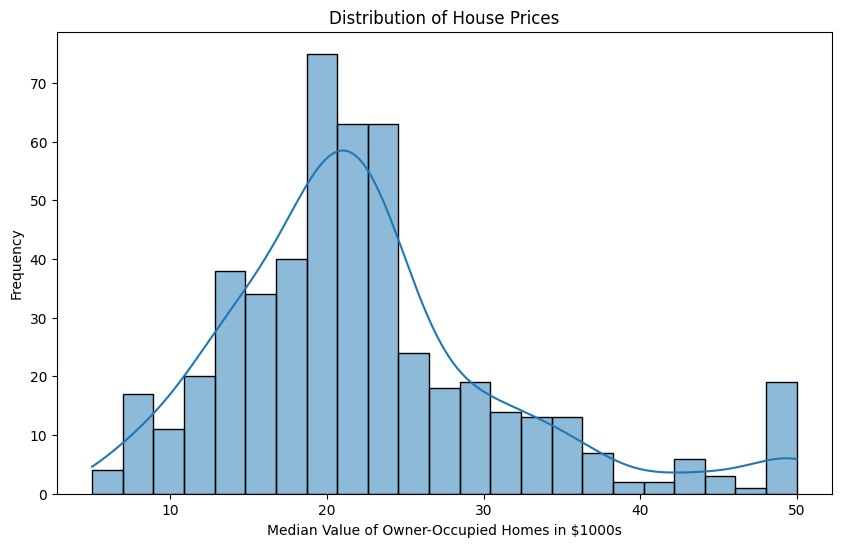

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['MEDV'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median Value of Owner-Occupied Homes in $1000s')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between RM (average number of rooms) and MEDV (house prices)

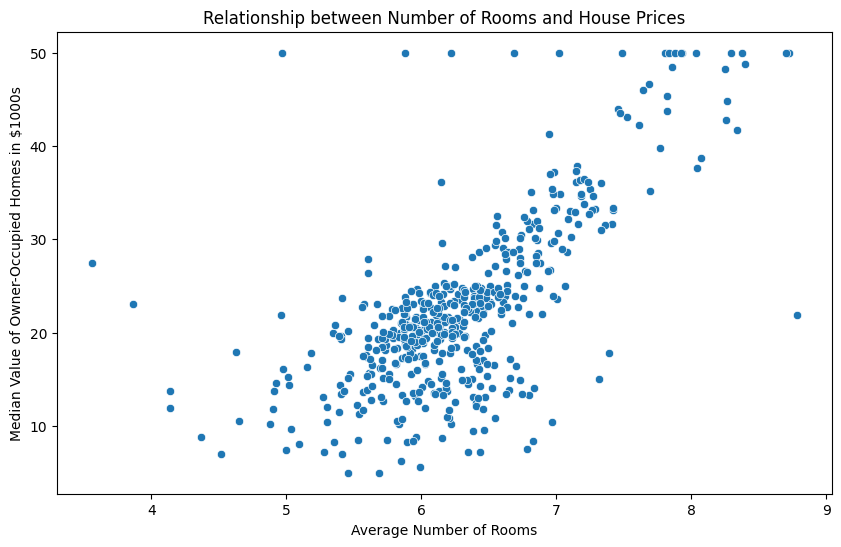

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=train_data)
plt.title('Relationship between Number of Rooms and House Prices')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Owner-Occupied Homes in $1000s')
plt.show()

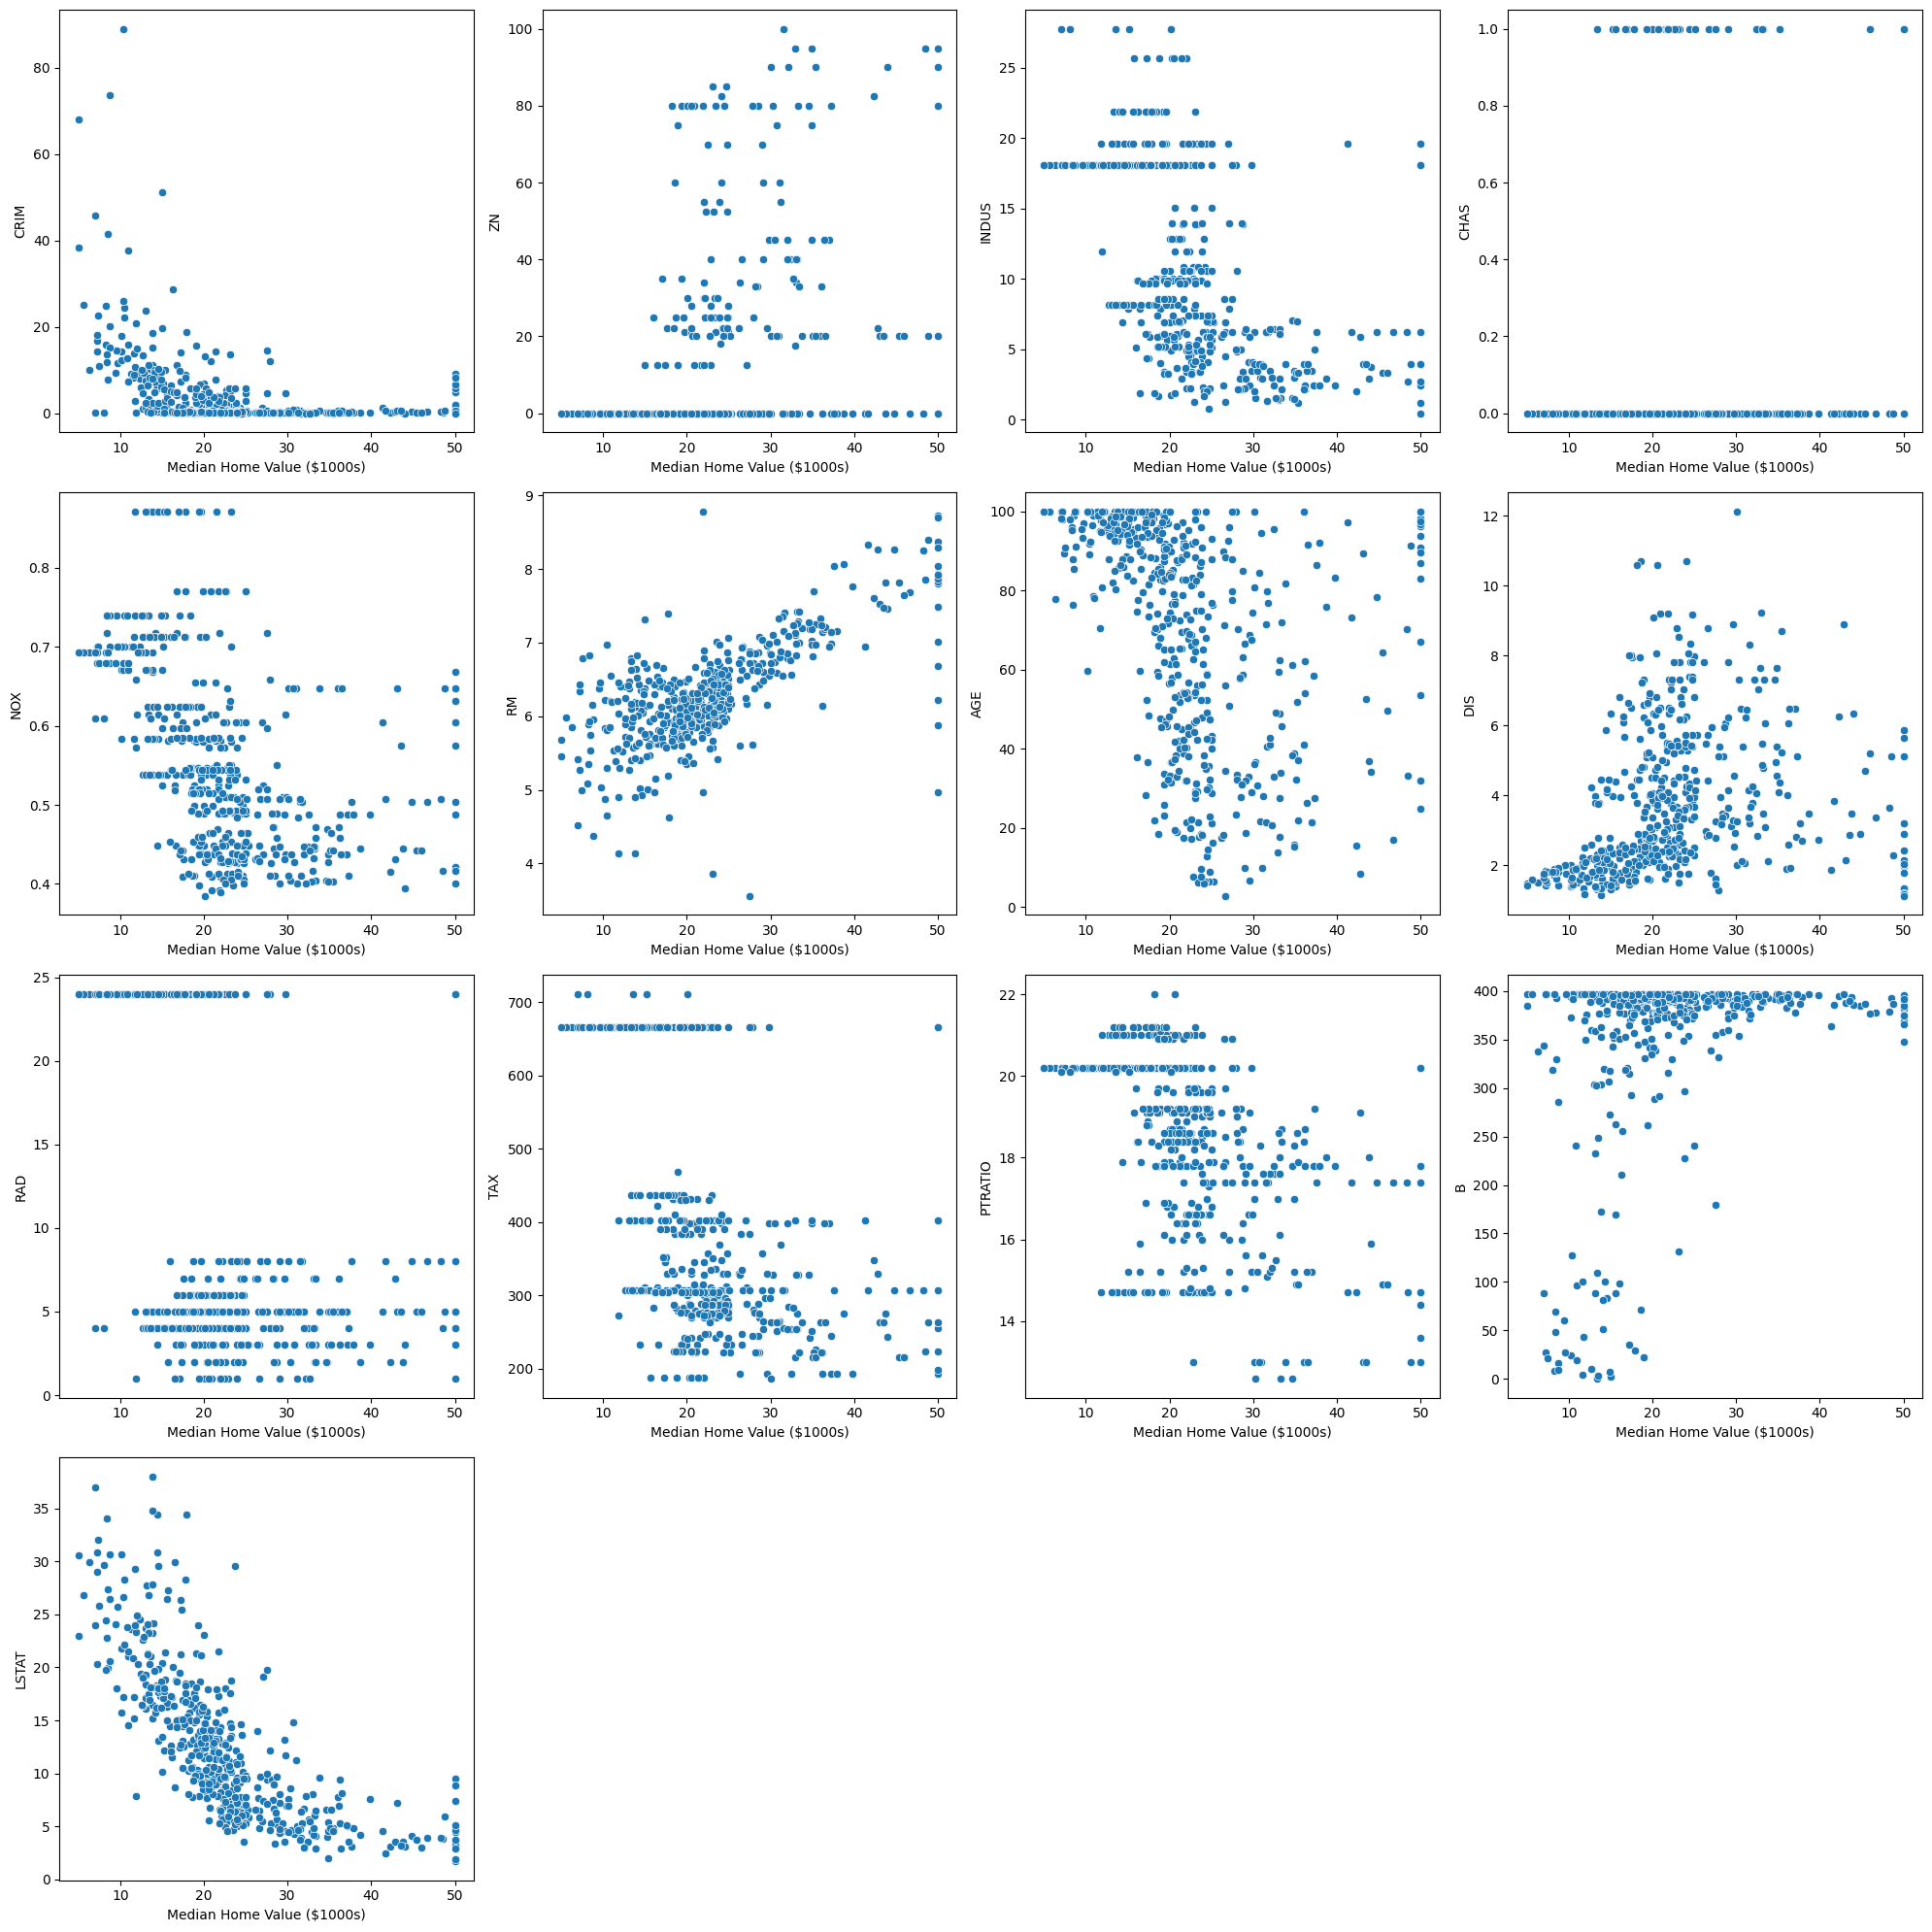

In [ ]:

# List of variables to compare with MEDV
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a figure with a grid of subplots (4 rows, 4 columns to match 13 variables)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust grid size to fit all variables
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the variables and create boxplots for each
for i, var in enumerate(variables):
    sns.scatterplot(data=train_data, x='MEDV', y=var, ax=axes[i])
    axes[i].set_xlabel('Median Home Value ($1000s)')
    axes[i].set_ylabel(var)

# Remove empty subplots if any
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


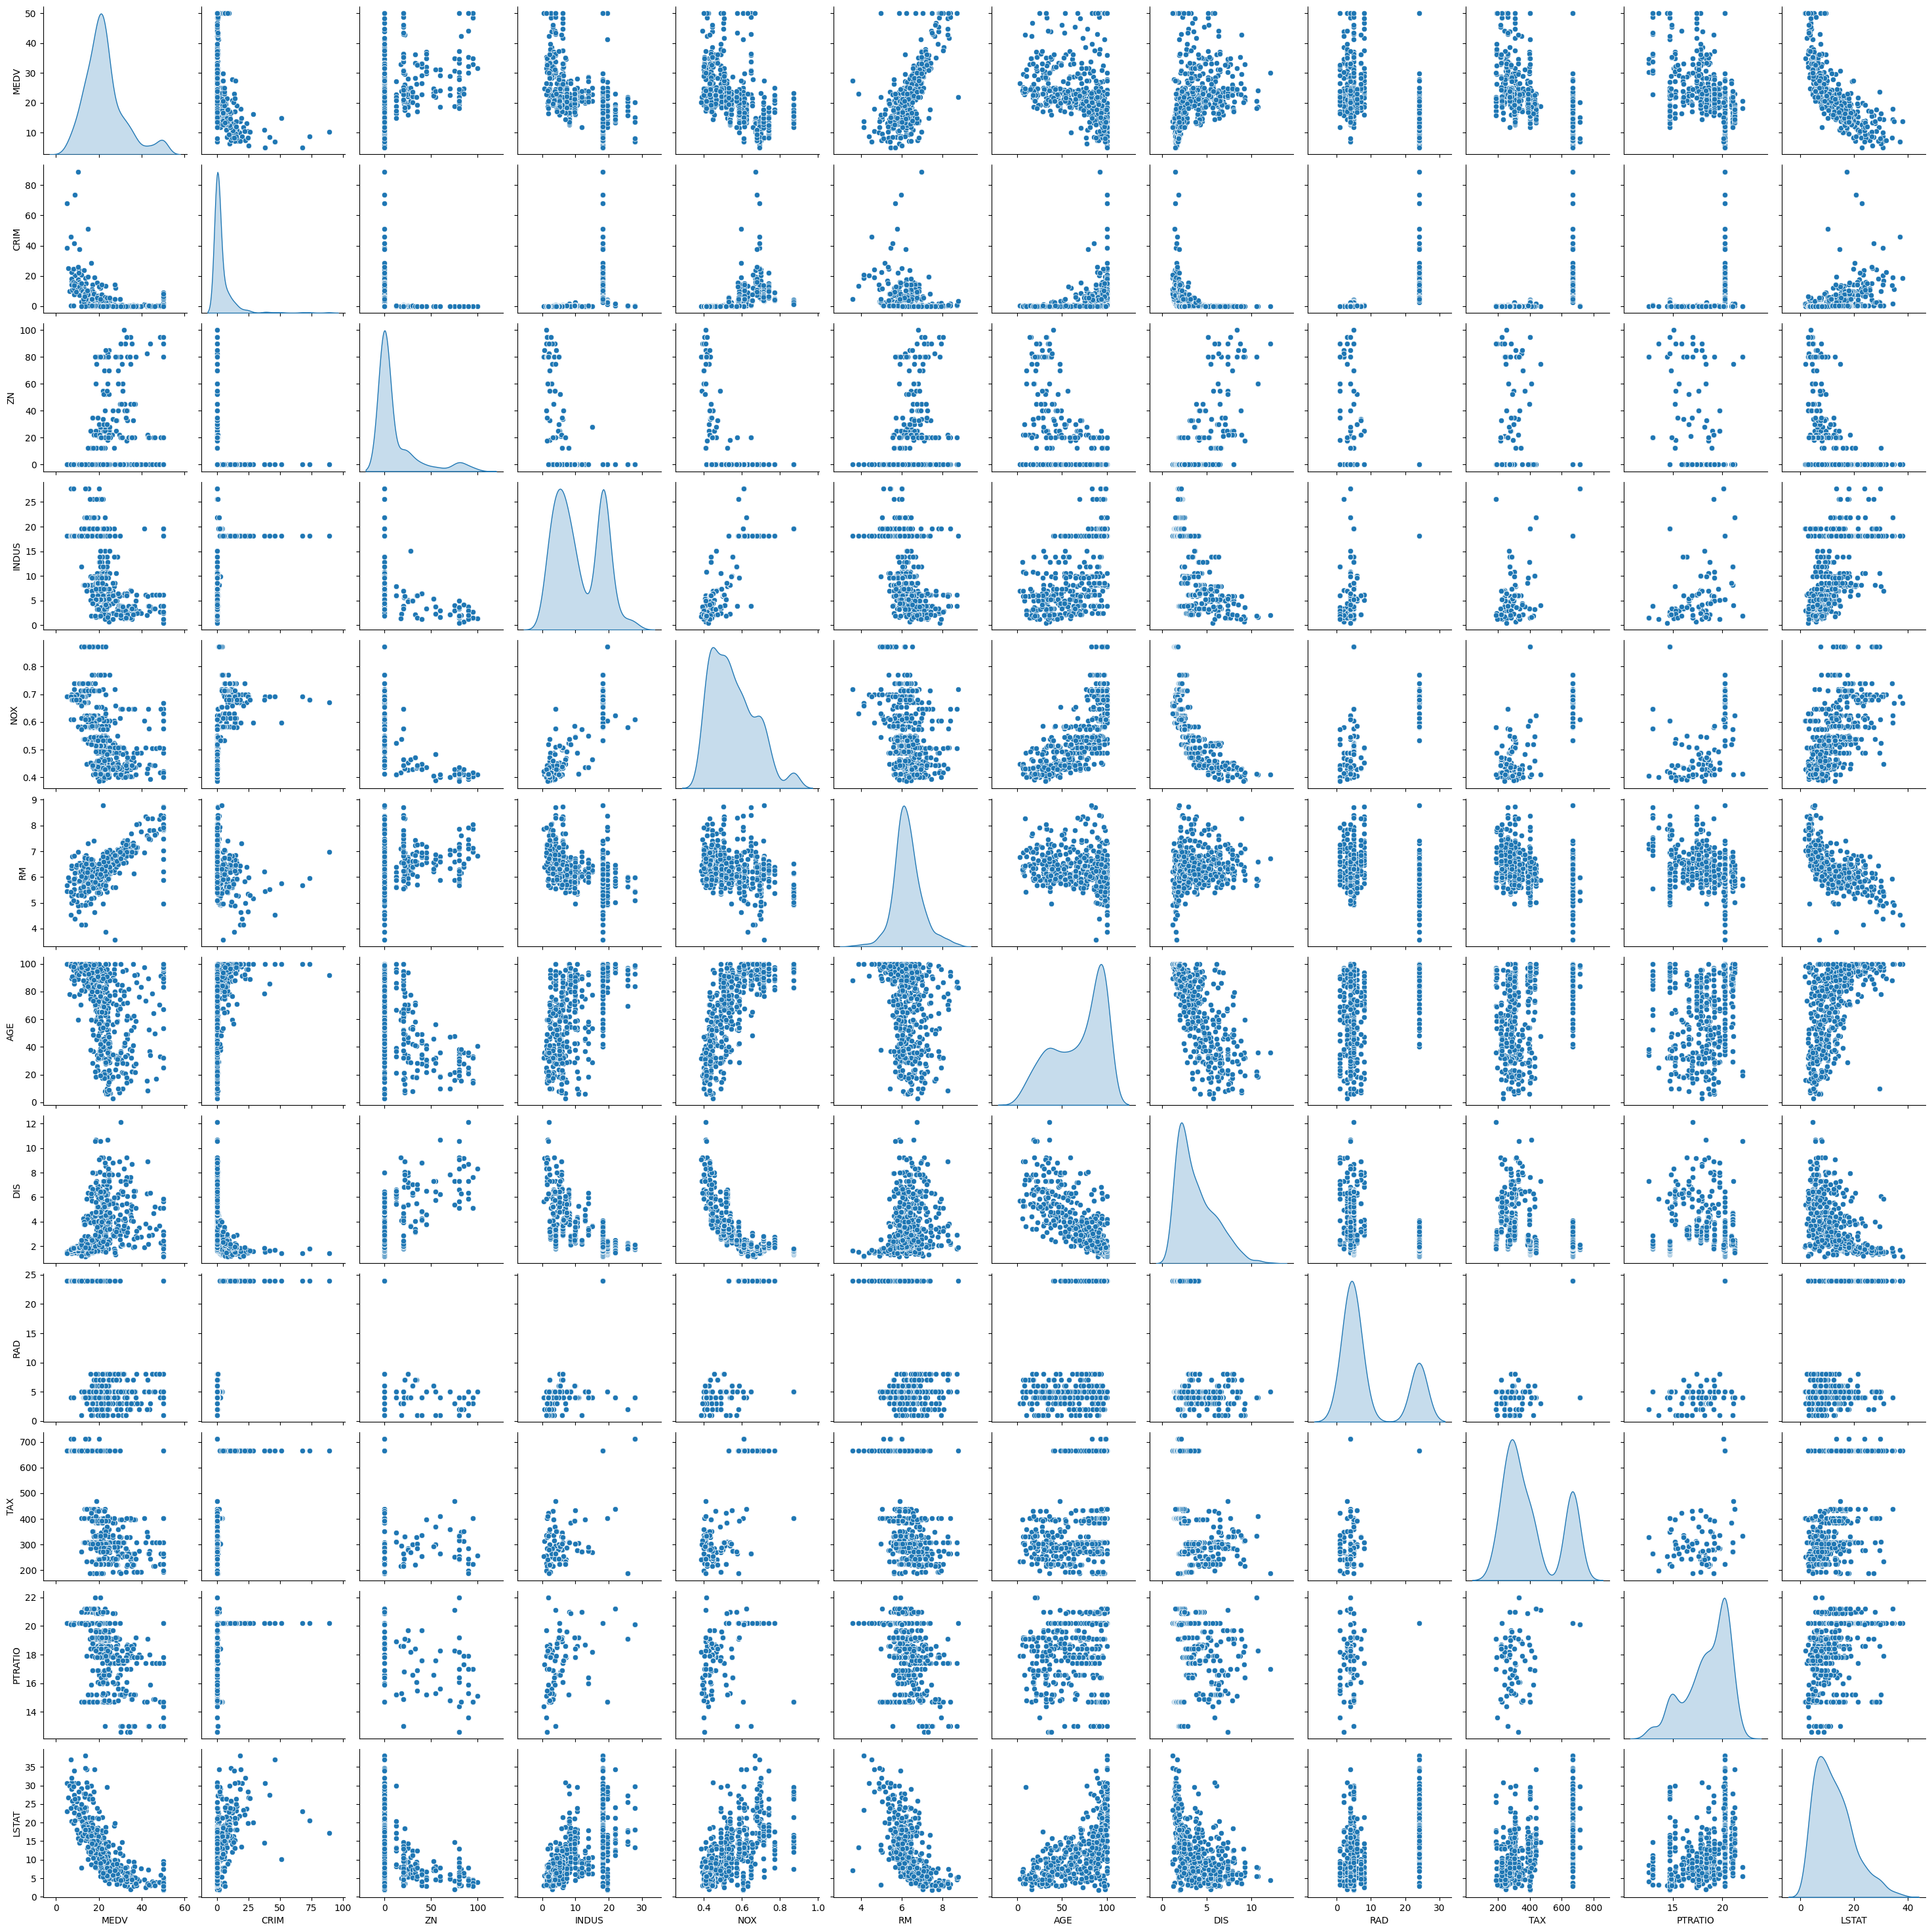

In [ ]:

# Selecting a subset of variables to compare
variables = ['MEDV', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# Create the pair plot
sns.pairplot(train_data[variables], diag_kind='kde')  # 'kde' creates kernel density estimates on the diagonal

# Show the plot
plt.show()


Looking for Correlations


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

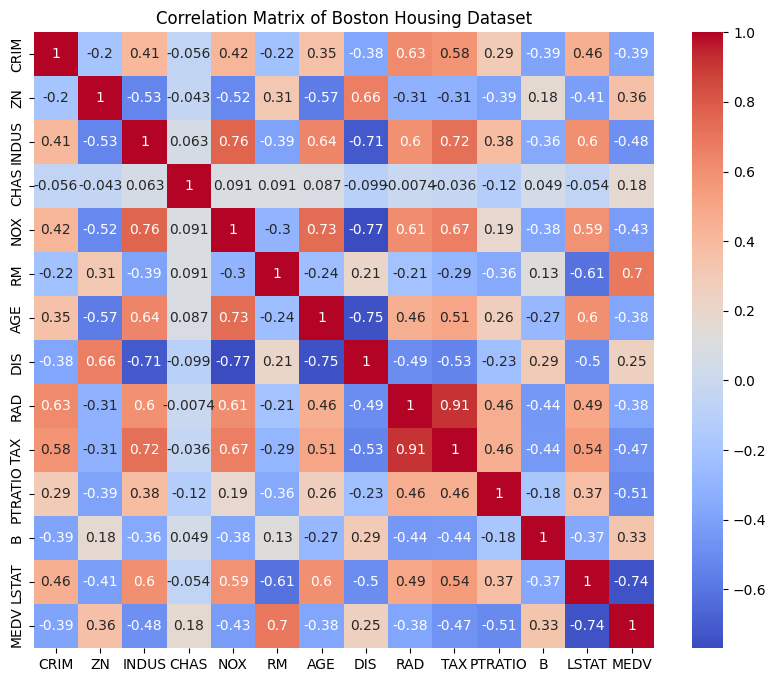

In [ ]:
correlation_matrix = train_data.corr()

print(correlation_matrix)


plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()

In [ ]:
medv_corr = train_data.corr()['MEDV'].sort_values(ascending=False)
print(medv_corr)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


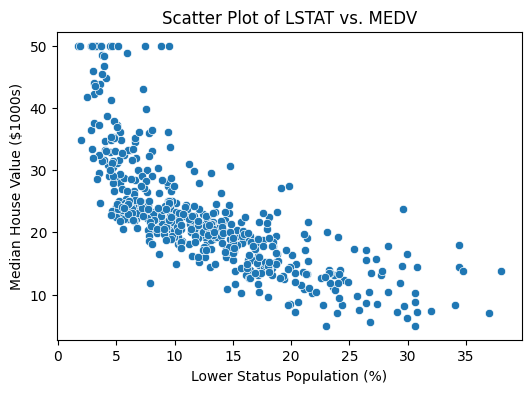

In [ ]:
# Scatter plot of features with high correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LSTAT', y='MEDV', data=train_data)
plt.title('Scatter Plot of LSTAT vs. MEDV')
plt.xlabel('Lower Status Population (%)')
plt.ylabel('Median House Value ($1000s)')
plt.show()


Experimenting with Attribute Combinations

In [ ]:
train_data['RM_LSTAT'] = train_data['RM'] * train_data['LSTAT']

print(train_data[['MEDV', 'RM_LSTAT']].corr())

              MEDV  RM_LSTAT
MEDV      1.000000 -0.729524
RM_LSTAT -0.729524  1.000000


In [ ]:
# Create rooms per household feature
train_data['RM_per_DIS'] = train_data['RM'] / train_data['DIS']

# Check correlation with MEDV
print(train_data[['MEDV', 'RM_per_DIS']].corr())


               MEDV  RM_per_DIS
MEDV        1.00000    -0.15483
RM_per_DIS -0.15483     1.00000


In [ ]:
# Create tax per room feature
train_data['TAX_per_RM'] = train_data['TAX'] / train_data['RM']

# Check correlation with MEDV
print(train_data[['MEDV', 'TAX_per_RM']].corr())


               MEDV  TAX_per_RM
MEDV        1.00000    -0.53765
TAX_per_RM -0.53765     1.00000


In [ ]:
# People per room (lower status population to rooms ratio)
train_data['LSTAT_per_RM'] = train_data['LSTAT'] / train_data['RM']

# Check correlation with MEDV
print(train_data[['MEDV', 'LSTAT_per_RM']].corr())


                  MEDV  LSTAT_per_RM
MEDV          1.000000     -0.707493
LSTAT_per_RM -0.707493      1.000000


In [ ]:
train_data['RM_AGE'] = train_data['RM'] * train_data['AGE']
print(train_data[['MEDV', 'RM_AGE']].corr())

            MEDV    RM_AGE
MEDV    1.000000 -0.191394
RM_AGE -0.191394  1.000000


In [ ]:
train_data['PTRATIO_B'] = train_data['PTRATIO'] * train_data['B']
print(train_data[['MEDV', 'PTRATIO_B']].corr())


               MEDV  PTRATIO_B
MEDV       1.000000   0.097187
PTRATIO_B  0.097187   1.000000


In [ ]:
train_data['LSTAT_per_PTRATIO'] = train_data['LSTAT'] / train_data['PTRATIO']
print(train_data[['MEDV', 'LSTAT_per_PTRATIO']].corr())


                       MEDV  LSTAT_per_PTRATIO
MEDV               1.000000          -0.679416
LSTAT_per_PTRATIO -0.679416           1.000000


In [ ]:
train_data['CRIM_LSTAT'] = train_data['CRIM'] * train_data['LSTAT']
print(train_data[['MEDV', 'CRIM_LSTAT']].corr())

                MEDV  CRIM_LSTAT
MEDV        1.000000   -0.422216
CRIM_LSTAT -0.422216    1.000000


In [ ]:
train_data['CRIM_B'] = train_data['CRIM'] * train_data['B']
print(train_data[['MEDV', 'CRIM_B']].corr())

            MEDV    CRIM_B
MEDV    1.000000 -0.312245
CRIM_B -0.312245  1.000000


In [ ]:
train_data['CRIM_NOX'] = train_data['CRIM'] * train_data['NOX']
print(train_data[['MEDV', 'CRIM_NOX']].corr())

              MEDV  CRIM_NOX
MEDV      1.000000 -0.397149
CRIM_NOX -0.397149  1.000000


In [ ]:
train_data['NOX_DIS'] = train_data['DIS'] * train_data['NOX']
print(train_data[['MEDV', 'NOX_DIS']].corr())

             MEDV   NOX_DIS
MEDV     1.000000  0.169703
NOX_DIS  0.169703  1.000000


Test Set and Model

In [ ]:
from sklearn.model_selection import train_test_split


X = train_data.drop(columns=['MEDV'])
y = train_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor MSE:", mse_dt)
print("Decision Tree Regressor R²:", r2_dt)


Decision Tree Regressor MSE: 10.191960784313725
Decision Tree Regressor R²: 0.8610195690841154


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_forest = forest_reg.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#For Linear Regression

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R²: {r2}")

Linear Regression MSE: 14.394569640564436
Linear Regression R²: 0.8037116180261026


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the linear regression model
scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

print("Linear Regression RMSE (Cross-Validation):", lin_rmse_scores.mean())


Linear Regression RMSE (Cross-Validation): 4.01109497460215


In [ ]:
# Create polynomial features or interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_train_scaled)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate Mean Squared Error and R² score
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("MSE of the best model:", mse_best)
print("R² of the best model:", r2_best)


MSE of the best model: 8.315533100789615
R² of the best model: 0.8866070623601932


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


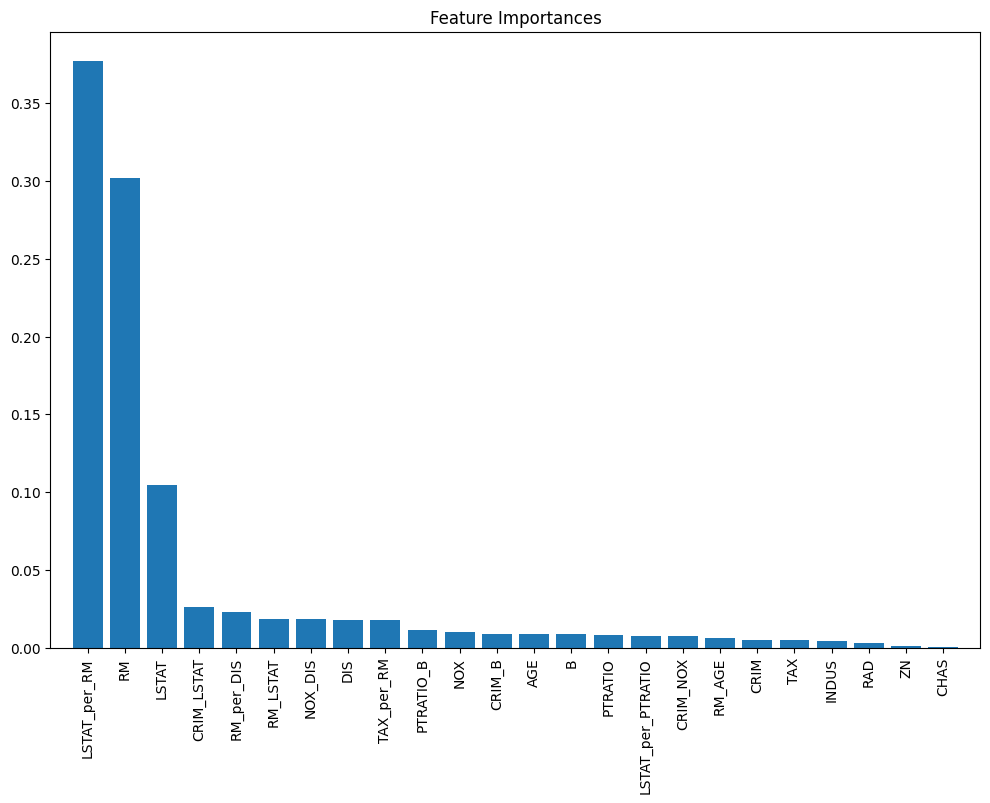

In [ ]:
# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_
feature_names = X_train.columns


importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Get feature names and their importances
feature_names = X_train.columns
importances = best_model.feature_importances_

# Create a dictionary of feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the feature importances dictionary from greatest to least
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted importances from greatest to least important
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


LSTAT_per_RM: 0.3771086067131957
RM: 0.30183545227955605
LSTAT: 0.10474436719610904
CRIM_LSTAT: 0.02585666131741127
RM_per_DIS: 0.023191811874792776
RM_LSTAT: 0.01826244700339846
NOX_DIS: 0.018187710251543643
DIS: 0.01758802351101436
TAX_per_RM: 0.017467885507065267
PTRATIO_B: 0.011250851664205634
NOX: 0.010190363409270656
CRIM_B: 0.009006600080299887
AGE: 0.008986282022878342
B: 0.008510273445844877
PTRATIO: 0.00799625644661216
LSTAT_per_PTRATIO: 0.007350565387828843
CRIM_NOX: 0.007286564526945743
RM_AGE: 0.006506629230108677
CRIM: 0.004996758304229264
TAX: 0.004889422476078736
INDUS: 0.004468016298301211
RAD: 0.003095159855550635
ZN: 0.0008584144522209207
CHAS: 0.00036487674553776865
